Example Notebook for reproducing issues with small inertia values.

In [1]:
from IPython.display import HTML
from brax import envs
from brax.io import html
import jax
from jax import numpy as jp

In [2]:
from single_finger import SingleFinger

environment = "single_finger"

envs.register_environment("single_finger",SingleFinger)
    
finger_env = envs.create(env_name=environment)
state = jax.jit(finger_env.reset)(jax.random.PRNGKey(0))

inertias: 
 [[[1.1932009e-03 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 1.1784504e-03 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 5.0048264e-05]]

 [[9.8959683e-04 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 9.8787015e-04 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 5.9882186e-05]]

 [[2.1099742e-04 0.0000000e+00 0.0000000e+00]
  [0.0000000e+00 2.0914285e-04 0.0000000e+00]
  [0.0000000e+00 0.0000000e+00 6.7040910e-06]]]


In [3]:
jit_env_step = jax.jit(finger_env.step)

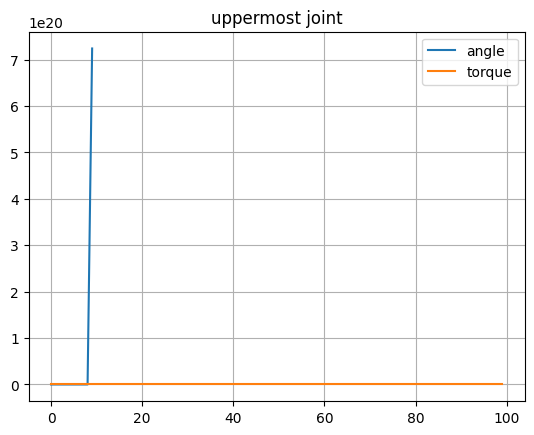

CPU times: user 11.3 s, sys: 700 ms, total: 12 s
Wall time: 8.05 s


In [4]:
%%time
import matplotlib.pyplot as plt

num_timesteps=100

finger_rollout = []
finger_actions = []
angles_1=[]
angles_2=[]
angles_3=[]
finger_rollout.append(state)

for i in range(num_timesteps):
    #action = jp.sin(i *jp.pi / 50+jp.arange(0, env.action_size))
    action=jp.array([0,0,0])
    finger_actions.append(action)
    
finger_actions=jp.array(finger_actions)
    
for torque in finger_actions:
    state = jit_env_step(state, torque)
    finger_rollout.append(state)
    
    angles_1.append(state.pipeline_state.q[0])
    angles_2.append(state.pipeline_state.q[1])
    angles_3.append(state.pipeline_state.q[2])

def print_plot(title,graphs,labels):
    plt.title(title)
    for i in range(len(graphs)):
        plt.plot(graphs[i], label=labels[i])
    plt.grid()
    plt.legend()
    plt.show()

print_plot("uppermost joint",[angles_1,finger_actions[:,0]],["angle","torque"])

# Visualizing Rollouts

In [5]:
import pickle

#save visualization as html file if HTML does not output as it should
visualization= html.render(finger_env.sys, [s.pipeline_state for s in finger_rollout],height=1024)
with open('single_finger.html', 'wb') as handle:
    pickle.dump(visualization, handle, protocol=pickle.HIGHEST_PROTOCOL)

HTML(visualization)

Experimenting with free fall of objects

In [6]:
from free_fall import FreeFall

environment = "free_fall"

envs.register_environment("free_fall",FreeFall)
    
fall_env = envs.create(env_name=environment)
state = jax.jit(fall_env.reset)(jax.random.PRNGKey(0))
jit_env_step = jax.jit(fall_env.step)  

inertias: 
 [[[1.05051535e-04 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.03062805e-04 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 6.21003574e-06]]

 [[9.89596825e-04 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 9.87870153e-04 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 5.98821862e-05]]

 [[1.19320094e-03 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.17845042e-03 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 5.00482638e-05]]]


In [ ]:
num_timesteps=700

fall_rollout = []
fall_actions = []
fall_rollout.append(state)

for i in range(num_timesteps):
    #action = jp.sin(i *jp.pi / 50+jp.arange(0, env.action_size))
    fall_action=jp.array([0,0,0])
    fall_actions.append(action)
    
fall_actions=jp.array(fall_actions)
    
for torque in fall_actions:
    state = jit_env_step(state, torque)
    fall_rollout.append(state)


In [ ]:
#save visualization as html file if HTML does not output as it should
visualization= html.render(fall_env.sys, [s.pipeline_state for s in fall_rollout],height=1024)
with open('free_fall.html', 'wb') as handle:
    pickle.dump(visualization, handle, protocol=pickle.HIGHEST_PROTOCOL)

HTML(visualization)